In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd
%cd ./drive/My Drive/Colab Notebooks/UniverseDacon/
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_submission.describe()

/content
/content/drive/My Drive/Colab Notebooks/UniverseDacon


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# TRAIN 데이터의 TYPE을 SAMPLE_SUBMISSION에 대응하는 가변수 형태로 변환시킵니다.
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

밑에 코드는 5000개씩으로 sampling (up & down)

In [0]:


# from collections import Counter
# print(sorted(Counter(train['type_num']).items()))
# type0 = train[train['type_num']==1]
# type1 = train[train['type_num']==4]
# type2 = train[train['type_num']==5]
# type3 = train[train['type_num']==6]
# type4 = train[train['type_num']==8]
# type5 = train[train['type_num']==10]
# type6 = train[train['type_num']==11]
# type7 = train[train['type_num']==13]
# type8 = train[train['type_num']==15]
# type9 = train[train['type_num']==18]
# type10 = train[train['type_num']==0]
# type11 = train[train['type_num']==2]
# type12 = train[train['type_num']==3]
# type13 = train[train['type_num']==7]
# type14 = train[train['type_num']==9]
# type15 = train[train['type_num']==12]
# type16 = train[train['type_num']==14]
# type17 = train[train['type_num']==16]
# type18 = train[train['type_num']==17]
# unsam_train0 = type0.sample(5000)
# unsam_train1 = type1.sample(5000)
# unsam_train2 = type2.sample(5000)
# unsam_train3 = type3.sample(5000)
# unsam_train4 = type4.sample(5000)
# unsam_train5 = type5.sample(5000)
# unsam_train6 = type6.sample(5000)
# unsam_train7 = type7.sample(5000)
# unsam_train8 = type8.sample(5000)
# unsam_train9 = type9.sample(5000)
# type10, type
# unsam_train = pd.concat([unsam_train0, unsam_train1, unsam_train2, unsam_train3, unsam_train4, unsam_train5, unsam_train6, unsam_train7, unsam_train8, unsam_train9, type10, type11, type12, type13, type14, type15, type16, type17, type18],axis=0)
# print(sorted(Counter(unsam_train['type_num']).items()))


train heatmap

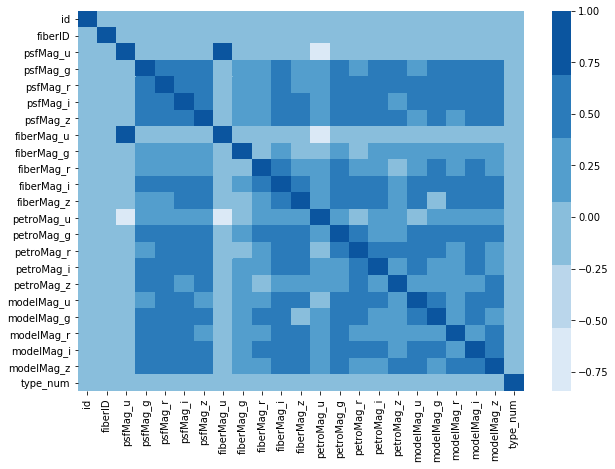

In [4]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

test heatmap

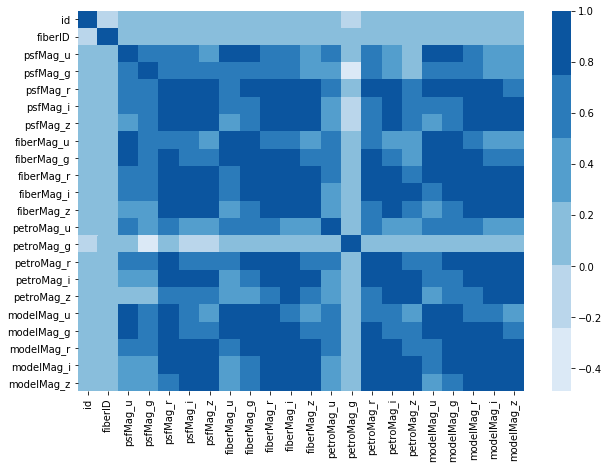

In [5]:
corr = test.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

train 에서 type column 을 없애고 test 랑 합쳐서 .

IQR 방법으로 Outlier 제거.

In [6]:
y_train = train['type_num']
train_wo_type = train.drop(columns=['type','type_num','fiberID'], axis=1)
test = test.drop(columns=['fiberID'])
total = pd.concat([train_wo_type, test])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 10008
Data columns (total 21 columns):
id            210000 non-null int64
psfMag_u      210000 non-null float64
psfMag_g      210000 non-null float64
psfMag_r      210000 non-null float64
psfMag_i      210000 non-null float64
psfMag_z      210000 non-null float64
fiberMag_u    210000 non-null float64
fiberMag_g    210000 non-null float64
fiberMag_r    210000 non-null float64
fiberMag_i    210000 non-null float64
fiberMag_z    210000 non-null float64
petroMag_u    210000 non-null float64
petroMag_g    210000 non-null float64
petroMag_r    210000 non-null float64
petroMag_i    210000 non-null float64
petroMag_z    210000 non-null float64
modelMag_u    210000 non-null float64
modelMag_g    210000 non-null float64
modelMag_r    210000 non-null float64
modelMag_i    210000 non-null float64
modelMag_z    210000 non-null float64
dtypes: float64(20), int64(1)
memory usage: 35.2 MB


Train + Test Heatmap

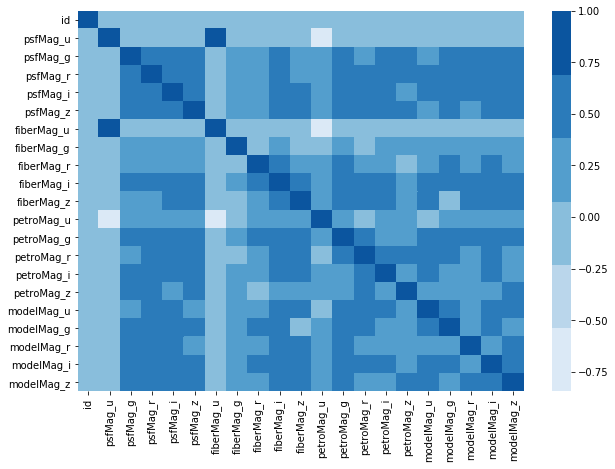

In [7]:
corr = total.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [8]:
from collections import Counter
def detect_outliers(df, n, features): 
  outlier_indices = [] 
  for col in features:
    if col == 'type' or col == 'id':
      continue; 
    Q1 = np.percentile(df[col], 25) 
    Q3 = np.percentile(df[col], 75) 
    IQR = Q3 - Q1 

    outlier_step =  IQR 
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
    outlier_indices.extend(outlier_list_col) 

  outlier_indices = Counter(outlier_indices) 
  multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
  print()
  return multiple_outliers 

features = total.columns
print(features)
dup = detect_outliers(total, 2, features)

print(len(dup))

filter(lambda a: a < 199991, dup)
print(len(dup))

train = train.drop(dup)
y_train = train['type']
X_train = train.drop(columns=['type','type_num','fiberID'], axis=1)
print(len(train))

Index(['id', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
       'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
       'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
       'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z'],
      dtype='object')

17762
17762
182229


In [0]:
y_train.describe()
X_train = train.drop(columns=['type','type_num','fiberID'], axis=1)

In [0]:
# from imblearn.over_sampling import SMOTE
# X_train = train_wo_type
# X_train, y_train = SMOTE(random_state=0).fit_sample(X_train,y_train)

In [11]:
pd.DataFrame(X_train).describe()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000,182229.000000
mean,100396.101921,20.855888,19.779514,19.245445,18.899164,18.671223,21.062110,20.012600,19.463795,19.113259,18.888456,21.521985,19.488738,18.944171,18.612366,18.437217,20.572519,19.432525,18.883271,18.531664,18.319689
std,57468.163736,1.790502,1.608758,1.527529,1.535532,1.632540,1.698662,1.599655,1.533725,1.551058,1.618937,410.514735,1.912601,1.735990,1.818485,5.906610,1.862178,1.712509,1.700296,1.730279,1.812540
min,0.000000,-12.978725,15.534827,12.794292,14.294240,-105.351185,9.283217,12.257588,14.834031,15.319877,9.709054,-271.434081,-198.876440,-8.527569,-23.732019,-789.601838,3.444448,15.122677,14.376813,13.964081,13.543951
25%,50696.000000,19.678580,18.754850,18.083439,17.784369,17.485351,19.968592,18.944384,18.289264,17.938394,17.653407,19.274328,18.145538,17.508612,17.082036,16.838435,19.288776,18.105588,17.450039,17.004965,16.736715
50%,100368.000000,20.796539,19.847648,19.396918,19.021397,18.691603,20.989379,20.012164,19.560842,19.150561,18.772313,20.309742,19.505059,19.085982,18.630353,18.203833,20.342366,19.462616,19.041649,18.574958,18.135049
75%,150092.000000,21.935463,20.912086,20.390437,20.053685,19.914544,22.129749,21.156615,20.659776,20.317997,20.177823,21.589570,20.767574,20.337331,20.001247,19.847269,21.744185,20.727185,20.286662,19.953243,19.860326
max,199990.000000,38.142419,26.606629,54.501228,29.525587,32.130146,44.615864,31.850156,26.338140,25.231795,31.898176,175257.982891,102.963130,111.756603,122.271336,2244.116502,49.487277,25.544319,33.666494,26.044025,27.913736


In [0]:
total = pd.concat([train_wo_type, test])

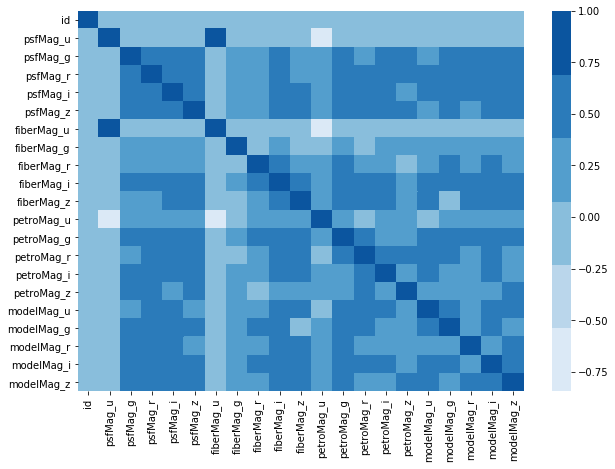

In [13]:
corr = total.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
y_train = train['type_num']
X_train = train.drop(columns=['type','type_num','fiberID'], axis=1)

PCA해서 변수 줄여보자

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=10)
lda.fit(X_train,y_train)
data_lda = lda.transform(X_train)
test_lda = lda.transform(test)
data_lda.shape
data_lda = pd.DataFrame(data_lda)

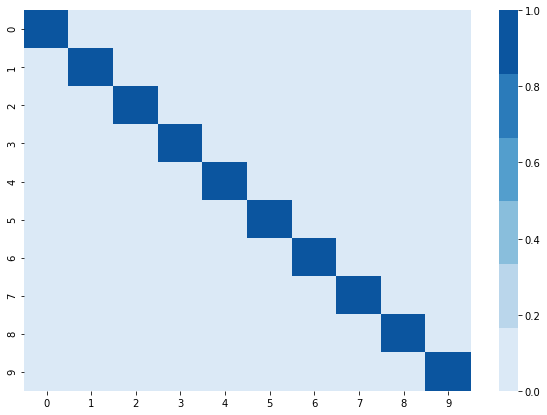

In [16]:
corr = data_lda.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [17]:
data_lda.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05
mean,2.067281e-14,-1.262894e-16,3.400836e-15,2.093936e-14,-3.491998e-14,-2.766471e-15,3.517712e-13,5.554800e-13,2.846296e-13,3.891314e-13
std,2.768967e+00,2.396567e+00,1.722562e+00,1.159571e+00,1.056071e+00,1.008921e+00,1.003119e+00,1.001962e+00,1.000812e+00,1.000441e+00
min,-1.936674e+01,-1.581827e+01,-7.302956e+00,-2.198974e+01,-2.320369e+01,-2.151712e+01,-4.061732e+01,-4.805426e+01,-6.353495e+01,-7.872928e+01
25%,-1.875033e+00,-7.448034e-01,-1.225320e+00,-6.601339e-01,-3.856893e-01,-3.618366e-01,-3.449896e-01,-1.879831e-01,-2.328564e-01,-2.072265e-01
50%,1.176115e+00,3.147061e-01,2.925741e-01,-1.424881e-01,-2.429792e-02,-3.330539e-03,-2.932458e-02,1.194319e-02,5.850815e-03,7.512610e-03
75%,1.786730e+00,1.333808e+00,1.235061e+00,4.942439e-01,4.973623e-01,2.965994e-01,2.456408e-01,2.330204e-01,2.463042e-01,2.319068e-01
max,1.171081e+01,3.006428e+01,1.140114e+01,1.369082e+01,2.825066e+01,5.152535e+01,6.243199e+01,4.757432e+01,4.805979e+01,6.844321e+01


In [18]:
test_lda = pd.DataFrame(test_lda)
test_lda.describe()

,0,1,2,3,4,5,6,7,8,9
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,-0.267020,0.143627,-0.025001,0.029821,0.000949,0.056408,0.054887,0.110549,-0.012324,-0.011257
std,3.348375,3.365413,2.172070,1.747201,1.997599,1.936119,2.641387,4.473484,3.953553,6.766966
min,-87.424427,-158.509581,-67.724805,-65.551567,-123.392602,-60.441072,-204.723725,-128.090981,-137.153513,-653.319550
25%,-2.060170,-0.819183,-1.301197,-0.680655,-0.406140,-0.355967,-0.311843,-0.139712,-0.268003,-0.162177
50%,1.139323,0.291196,0.321401,-0.141837,-0.029780,0.024554,0.013053,0.069360,-0.031491,0.057680
75%,1.763839,1.378883,1.269576,0.581757,0.541380,0.331021,0.299316,0.302501,0.222548,0.292642
max,49.093001,104.761915,88.348154,51.728198,21.741631,85.635522,37.886080,391.237902,305.895909,84.319873


In [19]:
data_lda['type'] = y_train
data_lda.describe()


,0,1,2,3,4,5,6,7,8,9,type
count,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,1.822290e+05,166020.000000
mean,2.067281e-14,-1.262894e-16,3.400836e-15,2.093936e-14,-3.491998e-14,-2.766471e-15,3.517712e-13,5.554800e-13,2.846296e-13,3.891314e-13,8.894356
std,2.768967e+00,2.396567e+00,1.722562e+00,1.159571e+00,1.056071e+00,1.008921e+00,1.003119e+00,1.001962e+00,1.000812e+00,1.000441e+00,4.671969
min,-1.936674e+01,-1.581827e+01,-7.302956e+00,-2.198974e+01,-2.320369e+01,-2.151712e+01,-4.061732e+01,-4.805426e+01,-6.353495e+01,-7.872928e+01,0.000000
25%,-1.875033e+00,-7.448034e-01,-1.225320e+00,-6.601339e-01,-3.856893e-01,-3.618366e-01,-3.449896e-01,-1.879831e-01,-2.328564e-01,-2.072265e-01,6.000000
50%,1.176115e+00,3.147061e-01,2.925741e-01,-1.424881e-01,-2.429792e-02,-3.330539e-03,-2.932458e-02,1.194319e-02,5.850815e-03,7.512610e-03,8.000000
75%,1.786730e+00,1.333808e+00,1.235061e+00,4.942439e-01,4.973623e-01,2.965994e-01,2.456408e-01,2.330204e-01,2.463042e-01,2.319068e-01,11.000000
max,1.171081e+01,3.006428e+01,1.140114e+01,1.369082e+01,2.825066e+01,5.152535e+01,6.243199e+01,4.757432e+01,4.805979e+01,6.844321e+01,18.000000


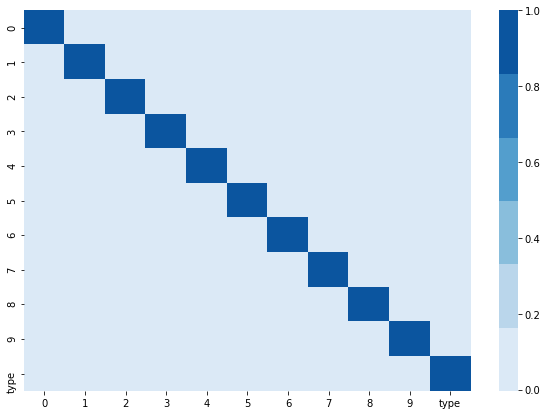

In [20]:
corr = data_lda.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
data_lda = data_lda.drop(columns=['type'], axis=1)

In [0]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# from sklearn.preprocessing import minmax_scale
# #Scaler = StandardScaler()
# #Scaler = MinMaxScaler()
# Scaler = RobustScaler()

# total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']] = Scaler.fit_transform(total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i','psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']])
# total.describe()
# X_train = total.iloc[:64488]
# test = total.iloc[64488:]
# X_train.describe()


,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,...,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000,64488.000000
mean,100127.701076,-0.698434,-0.896291,-0.818811,-0.627154,-0.441459,-0.324603,-0.700799,-0.344664,-0.589721,...,-0.624206,-0.407739,-0.264131,-0.550336,-0.581035,-0.112804,-0.453081,-0.528718,-0.529307,-0.588149
std,57619.958743,75.076131,93.867803,78.160423,57.690378,51.172801,51.877081,71.420705,38.216361,61.823813,...,68.079036,62.608936,34.621067,68.323132,68.459699,37.395511,79.329301,71.574339,65.207647,60.395757
min,0.000000,-10403.406478,-15232.644390,-10622.751079,-10483.898385,-7378.776458,-9114.073142,-11587.536526,-7518.155722,-8053.790430,...,-7361.680658,-7104.167086,-5148.129333,-14844.782701,-11234.263809,-5756.970616,-13626.125183,-13561.700317,-14235.876214,-9545.089329
25%,50285.750000,-0.444892,-0.484257,-0.599360,-0.628699,-0.524263,-0.448891,-0.468057,-0.582303,-0.605750,...,-0.439068,-0.485134,-0.575451,-0.586254,-0.500139,-0.404013,-0.483413,-0.578098,-0.585372,-0.494041
50%,99785.500000,-0.004660,-0.013438,-0.008686,-0.011902,-0.014400,-0.001560,-0.009062,-0.004268,-0.005967,...,0.005722,-0.002273,-0.003164,-0.003665,-0.003422,0.005407,-0.002188,-0.004152,-0.003552,-0.003976
75%,149990.750000,0.587986,0.520260,0.403968,0.389352,0.485872,0.579257,0.534770,0.418683,0.408957,...,0.573197,0.501350,0.409588,0.402371,0.481643,0.617275,0.504630,0.406583,0.402926,0.486779
max,199985.000000,44.791344,174.504932,1081.903906,925.338607,3855.040596,1693.867008,6.938360,1126.064263,3201.422690,...,101.109839,4473.535921,2600.730376,1042.441004,3221.912415,2688.881305,2885.742840,4545.101595,1476.589781,1480.444375


오버샘플링.

In [0]:
# from imblearn.over_sampling import SMOTE

# X_train, y_train = SMOTE(random_state=0).fit_sample(X_train,y_train)

8     46661
6     36064
18    21593
4     14546
5     12079
15    11899
10     9673
13     6504
1      6222
11     5801
7      4455
14     3125
0      2074
16     1068
3       363
17       50
2        37
12       13
9         2
Name: type_num, dtype: int64


Text(0.5, 1.0, 'type Values in the Training Set - train()')

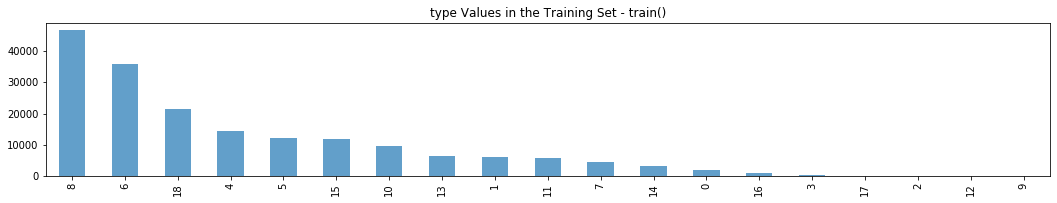

In [22]:
%matplotlib inline

print(y_train.value_counts())
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=0.1)

plt.subplot2grid((3,3), (0,0), colspan=3)
y_train.value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train()')

In [23]:
test.describe()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,204995.000000,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2889.493756,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,199991.000000,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,202493.000000,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,204995.000000,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,207497.000000,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,209999.000000,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, \
                                                  test_size=0.2, random_state=0)

In [0]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(train['type_num']),
                                             train['type_num']))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

LDA 안한 것으로 돌려야 더 성능이 좋음.

In [28]:
%%time
from xgboost import XGBClassifier

XGB_clf = XGBClassifier(max_depth = 11,n_esetimators=1500, n_jobs=-1, random_state=0)
XGB_clf.get_params()
XGB_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], early_stopping_rounds=12)#, sample_weight=w_array)

[0]	validation_0-merror:0.128218	validation_1-merror:0.153295
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 12 rounds.
[1]	validation_0-merror:0.119753	validation_1-merror:0.148055
[2]	validation_0-merror:0.114876	validation_1-merror:0.146024
[3]	validation_0-merror:0.111138	validation_1-merror:0.14446
[4]	validation_0-merror:0.108511	validation_1-merror:0.144433
[5]	validation_0-merror:0.106405	validation_1-merror:0.143335
[6]	validation_0-merror:0.104175	validation_1-merror:0.143226
[7]	validation_0-merror:0.102351	validation_1-merror:0.142649
[8]	validation_0-merror:0.10102	validation_1-merror:0.142787
[9]	validation_0-merror:0.099552	validation_1-merror:0.142677
[10]	validation_0-merror:0.098057	validation_1-merror:0.141854
[11]	validation_0-merror:0.096719	validation_1-merror:0.141278
[12]	validation_0-merror:0.095752	validation_1-merror:0.141278
[13]	validation_0-merror:0.094

In [26]:
XGB_pred = XGB_clf.predict_proba(test)
submission = pd.DataFrame(data=XGB_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('XGBPreprocess.csv', index=True)
submission.describe()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,0.011647,0.033412,0.003402,0.012668,0.073760,0.063643,0.185626,0.026149,0.244892,0.002329,0.067558,0.033236,0.002236,0.035285,0.017007,0.070840,0.007760,0.003471,0.105080
std,0.053317,0.164333,0.013862,0.082289,0.234098,0.200423,0.369877,0.083230,0.367207,0.003877,0.237880,0.077012,0.002174,0.123631,0.103953,0.234391,0.064968,0.012576,0.236272
min,0.000692,0.000594,0.000592,0.000593,0.000593,0.000601,0.000764,0.000783,0.001007,0.000590,0.000596,0.000733,0.000602,0.000638,0.000594,0.000590,0.000590,0.000615,0.000631
25%,0.000972,0.000874,0.000851,0.000852,0.000861,0.000906,0.001746,0.004351,0.003626,0.000846,0.000867,0.002849,0.000872,0.001015,0.000912,0.000879,0.000852,0.000867,0.000951
50%,0.002419,0.002074,0.001885,0.001938,0.002120,0.002712,0.003300,0.006109,0.020486,0.001861,0.002151,0.011532,0.001895,0.002320,0.001957,0.002080,0.001966,0.001944,0.002556
75%,0.004338,0.003466,0.002993,0.003044,0.003570,0.007458,0.012905,0.012423,0.348816,0.002946,0.003396,0.028243,0.002970,0.013384,0.003125,0.003343,0.003047,0.003115,0.015261
max,0.825531,0.977849,0.388980,0.957473,0.942374,0.940331,0.983841,0.983256,0.982949,0.156197,0.974624,0.852850,0.105244,0.958283,0.928338,0.978748,0.970200,0.356457,0.970641
